In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import seaborn as sns
from wordcloud import WordCloud
import logging
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
!pip install mediapipe

In [3]:
!pip uninstall -y protobuf
!pip install protobuf==3.20.0

Found existing installation: protobuf 4.25.6
Uninstalling protobuf-4.25.6:
  Successfully uninstalled protobuf-4.25.6
  Using cached protobuf-3.20.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (698 bytes)
Using cached protobuf-3.20.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-aiplatform 1.74.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have p

In [4]:
!pip uninstall -y mediapipe
!pip install mediapipe

Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21
  Using cached mediapipe-0.10.21-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached mediapipe-0.10.21-cp310-cp310-manylinux_2_28_x86_64.whl (35.6 MB)
Using cached protobuf-4.25.6-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.25.6 which is incompatible.
google-cloud-bigtable 2.27

In [5]:
import mediapipe as mp

In [6]:
# import os
# dataset_path = '/kaggle/input/asl-citizen/ASL_Citizen'
# for root, dirs, files in os.walk(dataset_path):
#     print(f"Root: {root}")
#     print(f"Dirs: {dirs}")
#     print(f"Files (first 5): {files[:5]}")
#     print(f"Total files: {len(files)}")

In [7]:
base_path = '/kaggle/input/asl-citizen/ASL_Citizen'
video_dir = os.path.join(base_path, 'videos')
splits_dir = os.path.join(base_path, 'splits')

In [8]:
seed=random.seed(1024)
print(random.randint(7,12))

7


# Data Exploration

In [9]:
import pandas as pd
train = pd.read_csv('/kaggle/input/asl-citizen/ASL_Citizen/splits/train.csv')
test = pd.read_csv('/kaggle/input/asl-citizen/ASL_Citizen/splits/test.csv')
val = pd.read_csv('/kaggle/input/asl-citizen/ASL_Citizen/splits/val.csv')

In [10]:
train.sample(20)

Participant ID                             Video file        Gloss  \
39388            P52  35429410535817274-seedPOLICEMAN 2.mp4   POLICEMAN2   
37979            P52  44078420067938096-seedGRANDFATHER.mp4  GRANDFATHER   
38904            P52        3714229153567834-seedPOSSUM.mp4       POSSUM   
7260             P37            17206490294219856-LOUSY.mp4        LOUSY   
30114            P11          02533506049521228-SLICE 3.mp4       SLICE4   
16153            P50            4479666657560897-VAGINA.mp4       VAGINA   
4739             P37          6309157014119988-GO AHEAD.mp4      GOAHEAD   
3984             P40             18346556667366354-JUMP.mp4         JUMP   
30682            P11      49843300903132026-EXPERIENCED.mp4  EXPERIENCED   
19436             P4               1828535307475454-BOX.mp4          BOX   
11324            P16        45413966416815077-STARBUCKS.mp4    STARBUCKS   
5202             P37              9670746241323227-FIRE.mp4         FIRE   
3112             P40             6215870928266889-BRUSH.mp4        BRUSH   
2441             P40             8023267651086026-ADMIT.mp4        ADMIT   
4113             P40        25729930987639915-TAKE PILL.mp4     TAKEPILL   
20229            P29            8913961089637739-NEPHEW.mp4       NEPHEW   
18481            P23            8281087217074876-DARK 2.mp4        DARK2   
30767            P29           690133837226921-WHAT FOR.mp4     WHATFOR1   
5937             P37            7906202332706018-BURY 2.mp4        BURY1   
31520            P29       5236257976686955-HIGH SCHOOL.mp4   HIGHSCHOOL   

      ASL-LEX Code  
39388     K_03_104  
37979     B_02_036  
38904     H_03_079  
7260      F_01_074  
30114     K_02_057  
16153     F_02_065  
4739      J_01_041  
3984      C_02_089  
30682     F_02_023  
19436     C_03_025  
11324     B_03_010  
5202      B_03_090  
3112      A_01_072  
2441      J_02_062  
4113      F_01_045  
20229     A_01_005  
18481     E_01_012  
30767     C_02_054  
5937      K_03_018  
31520     C_02_060

In [11]:
test.sample(7)

Participant ID                         Video file        Gloss  \
16727            P18            572165517693713-FIX.mp4          FIX   
6280             P42          5318101950293772-TEAM.mp4         TEAM   
1650             P35  035484107742985715-MAINSTREAM.mp4   MAINSTREAM   
12007            P18        7764931959114625-ASSIST.mp4       ASSIST   
5654             P35   13041439929627674-INCREDIBLE.mp4   INCREDIBLE   
14722            P18  9326809316611697-HAIR CLIPPER.mp4  HAIRCLIPPER   
26413             P9        36311506053482656-PRICE.mp4        PRICE   

      ASL-LEX Code  
16727     G_03_043  
6280      E_01_071  
1650      J_03_037  
12007     J_03_093  
5654      J_03_080  
14722     E_02_080  
26413     C_02_004

In [12]:
test.sample(7)

Participant ID                        Video file        Gloss  \
20511            P49  06472404047240277-PISSED OFF.mp4    PISSEDOFF   
17883            P47       36880978449657653-SWEET.mp4        SWEET   
25242            P22    7115298361591413-CHALLENGE.mp4    CHALLENGE   
3308             P42       6847666724973207-ISRAEL.mp4       ISRAEL   
8590             P35       6876167540666125-AGENCY.mp4       AGENCY   
25684            P22  6618847619066812-OPPORTUNITY.mp4  OPPORTUNITY   
32673            P22   9351263525693883-HANDSOME 3.mp4    HANDSOME4   

      ASL-LEX Code  
20511     H_03_056  
17883     J_03_029  
25242     B_03_051  
3308      B_02_018  
8590      H_01_044  
25684     J_02_090  
32673     E_03_041

In [13]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40154 entries, 0 to 40153
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant ID  40154 non-null  object
 1   Video file      40154 non-null  object
 2   Gloss           40154 non-null  object
 3   ASL-LEX Code    40066 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB
None


In [14]:
train.isnull().sum()

Participant ID     0
Video file         0
Gloss              0
ASL-LEX Code      88
dtype: int64

In [15]:
print("trainig set has : ", train.shape[0], " rows")
print("val set has : ", val.shape[0], " rows")
print("testing set has : ", test.shape[0], " rows")

trainig set has :  40154  rows
val set has :  10304  rows
testing set has :  32941  rows


In [16]:
#changing column names to follow convention
train.rename(columns={'Participant ID' : 'p_id',
                   'Video file': 'video_id',
                   'Gloss' : 'gloss',
                   'ASL-LEX Code' : 'code'
                  }, inplace=True)
#changing column names to follow convention
test.rename(columns={'Participant ID' : 'p_id',
                   'Video file': 'video_id',
                   'Gloss' : 'gloss',
                   'ASL-LEX Code' : 'code'
                  }, inplace=True)
#changing column names to follow convention
val.rename(columns={'Participant ID' : 'p_id',
                   'Video file': 'video_id',
                   'Gloss' : 'gloss',
                   'ASL-LEX Code' : 'code'
                  }, inplace=True)

In [17]:
train.columns

Index(['p_id', 'video_id', 'gloss', 'code'], dtype='object')

In [18]:
#checking for videos
video_files = os.listdir(video_dir)
sample_vid = train.iloc[34:50]['video_id']
for vid in sample_vid:
    if vid in video_files:
        print("found")
    else:
        print("Does not exist")

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found


In [19]:
unique_glosses = len(train['gloss'].unique())
print(f"total glosses: {len(train['gloss'])} \nunique: {unique_glosses} ")

total glosses: 40154 
unique: 2731 


In [20]:
signers = len(train['p_id'].unique())
print(f"Number of signers: {signers} ")

Number of signers: 35 


In [21]:
#which signer recorded how many videos?
p_id_counts = train['p_id'].value_counts()
p_id_counts

p_id
P33    3000
P11    3000
P27    2999
P40    2998
P50    2991
P37    2989
P31    2971
P29    2933
P52    2728
P16    2149
P14    1755
P51    1502
P30    1490
P7     1195
P23    1000
P43     901
P4      444
P34     425
P36     380
P46     374
P28     322
P20     319
P2      221
P25     144
P10     141
P24     125
P38     120
P8      113
P3      109
P1      104
P32     102
P45      58
P44      42
P41       7
P19       3
Name: count, dtype: int64

In [22]:
def get_video_info(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return {'frames': frames, 'fps': fps, 'width': width, 'height': height}

In [23]:
# meta_df = pd.DataFrame()

# # Wrap 'train['video_id']' with tqdm to display progress
# for vid in tqdm(train['video_id'], desc="Processing Videos", unit="video"):
#     path = os.path.join(video_dir, vid)
#     info = get_video_info(path)
    
#     if info:
#         meta_df = pd.concat([meta_df, pd.DataFrame([{
#             'video_id': vid,
#             'frames': info['frames'],
#             'fps': info['fps'],
#             'width': info['width'],
#             'height': info['height']
#         }])], ignore_index=True)

# print(meta_df)


In [24]:
# meta_df['duration'] = (meta_df['frames'] / meta_df['fps']).round(2)

In [25]:
meta_df = pd.read_csv("/kaggle/input/asl-video-meta-data/video_metadata (1).csv")

In [26]:
meta_df.head()

video_id  frames        fps  width  height  \
0       15890366051589533-APPLE.mp4      71  29.919933    640     480   
1  35618482303951104-IMPOSSIBLE.mp4      76  29.968454    640     480   
2         6958143575951994-PARK.mp4      87  30.000000    640     480   
3     8006032738002744-SOCCER 2.mp4     112  30.002679    640     480   
4       37542279833186454-STINK.mp4      87  30.000000    640     480   

   duration  
0      2.37  
1      2.54  
2      2.90  
3      3.73  
4      2.90

In [27]:
meta_df.to_csv("/kaggle/working/video_metadata.csv", index=False)
print("File saved to: /kaggle/working/video_metadata.csv")

File saved to: /kaggle/working/video_metadata.csv


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


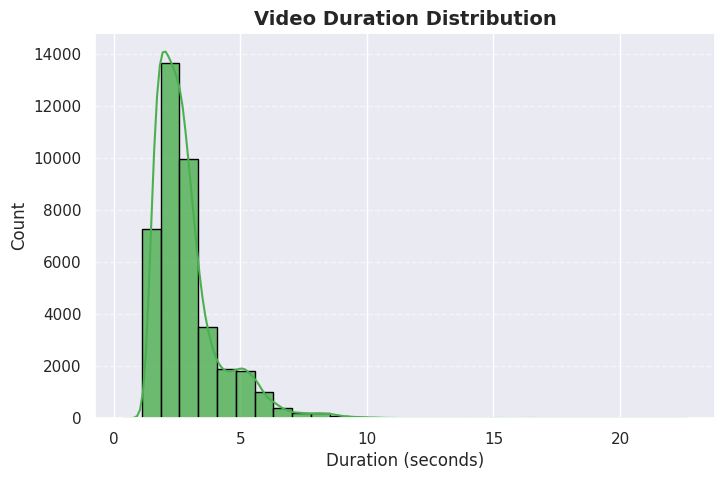

In [28]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="darkgrid")  # Stylish background
sns.histplot(meta_df['duration'], bins=30, kde=True, 
             color='#4CAF50', edgecolor='black', alpha=0.8)
plt.title("Video Duration Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


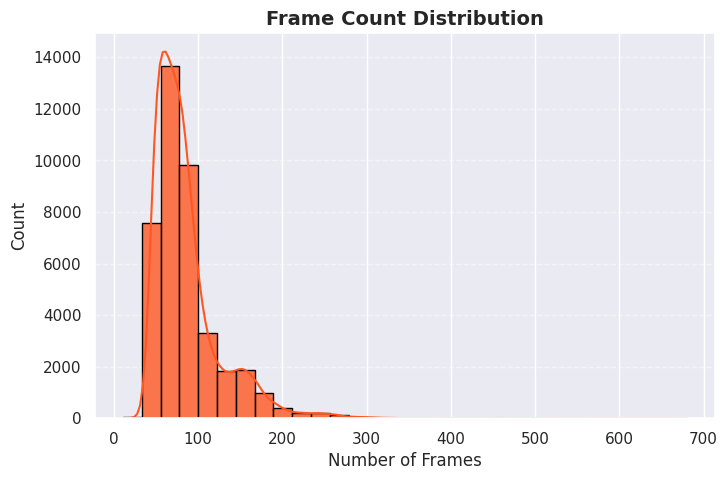

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(meta_df['frames'], bins=30, kde=True, 
             color='#FF5722', edgecolor='black', alpha=0.8)
plt.title("Frame Count Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Number of Frames", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

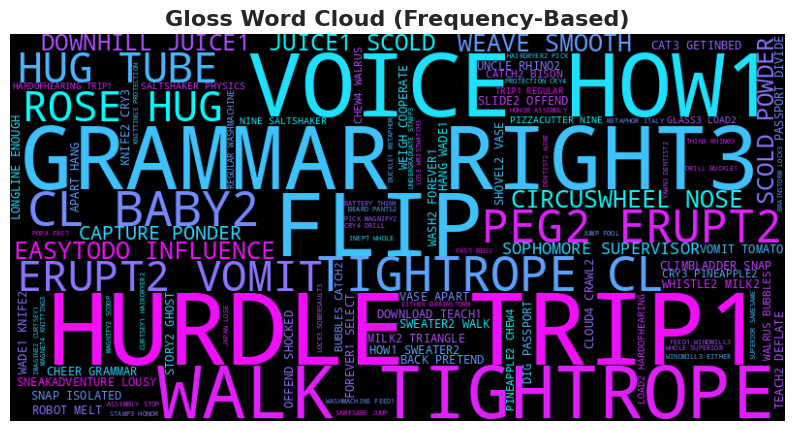

In [30]:
gloss_text = ' '.join(train['gloss'].values)

wordcloud = WordCloud(
    width=800, height=400, 
    background_color='black', 
    colormap='cool', 
    max_words=100,     
    contour_color='white', contour_width=2
).generate(gloss_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.title("Gloss Word Cloud (Frequency-Based)", fontsize=16, fontweight='bold')
plt.show()

Plotting a Gloss vs Duration chart can reveal important insights, such as:

1. Which glosses tend to have longer or shorter durations.
2. Potential outliers (e.g., unusually long or short signs).
3. Patterns in sign complexity — longer durations might indicate complex signs or gestures.

In [31]:
train_n_meta = pd.merge(train, meta_df, on='video_id', how='inner')

In [32]:
train_n_meta.head()

p_id                          video_id       gloss      code  frames  \
0   P1       15890366051589533-APPLE.mp4       APPLE  A_03_054      71   
1   P1  35618482303951104-IMPOSSIBLE.mp4  IMPOSSIBLE  B_01_032      76   
2   P1         6958143575951994-PARK.mp4        PARK  E_03_028      87   
3   P1     8006032738002744-SOCCER 2.mp4     SOCCER2  F_03_032     112   
4   P1       37542279833186454-STINK.mp4       STINK  H_01_064      87   

         fps  width  height  duration  
0  29.919933    640     480      2.37  
1  29.968454    640     480      2.54  
2  30.000000    640     480      2.90  
3  30.002679    640     480      3.73  
4  30.000000    640     480      2.90

# Mediapipe keypoints extraction

In [33]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

sample_video_path = os.path.join(video_dir, train_n_meta['video_id'].iloc[40])
output_video_path = 'processed_video.mp4'

cap = cv2.VideoCapture(sample_video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, cap.get(cv2.CAP_PROP_FPS), 
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    out.write(frame) 

cap.release()
out.release()

print(f"Processed video saved as: {output_video_path}")

Processed video saved as: processed_video.mp4


In [34]:
yes??

Object `yes` not found.


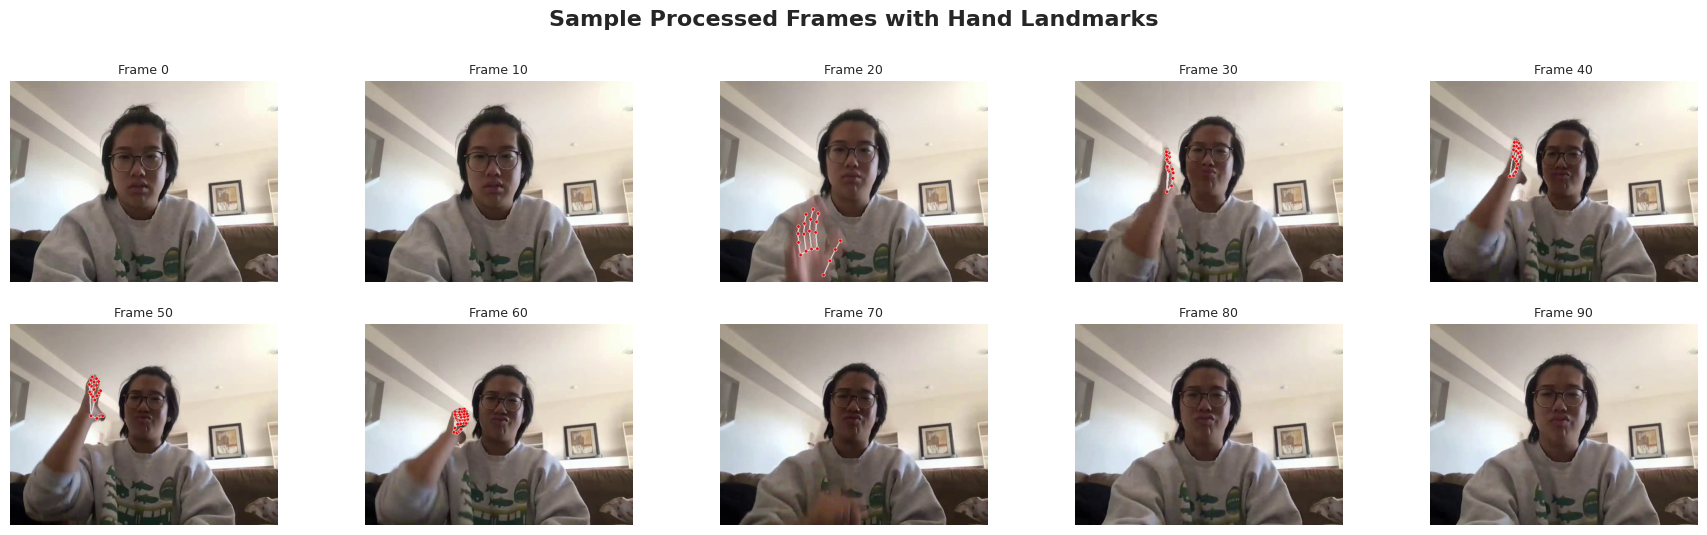

In [35]:
cap = cv2.VideoCapture(output_video_path)

frame_interval = 10   # Display every 10th frame
frames_to_show = 15   # Number of frames to display

plt.figure(figsize=(18, 8))  # Increased width to accommodate 15 frames

# Display frames in 3 rows × 5 columns for better organization
rows, cols = 3, 5

for i in range(frames_to_show):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i * frame_interval)
    ret, frame = cap.read()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(frame_rgb)
        plt.title(f"Frame {i * frame_interval}", fontsize=9)
        plt.axis('off')

plt.suptitle("Sample Processed Frames with Hand Landmarks", fontsize=16, fontweight='bold')
plt.tight_layout(pad=1.5)  # Balanced spacing for improved clarity
plt.show()

cap.release()


# Video Preprocessing

1. Resize them to a standard size (e.g., 224x224) for ML compatibility.
2. Save the results efficiently (e.g., as NumPy arrays) in Kaggle’s working directory.

In [36]:
combined_df = pd.concat([train, test, val]).reset_index(drop=True)
gloss_counts = combined_df['gloss'].value_counts()
gloss_counts

gloss
DOG1           45
BASKETBALL1    44
WHATFOR1       43
BELT1          40
PARTY1         39
               ..
DEMAND2        22
GUESS2         22
SHAVE2         22
LETTUCE2       21
BEE2           21
Name: count, Length: 2731, dtype: int64

In [37]:
# Identify glosses with ≥ 38 videos
selected_glosses = gloss_counts[gloss_counts >= 39].index
selected_glosses.size

23

In [38]:
# Filter videos with selected glosses
filtered_videos = combined_df[combined_df['gloss'].isin(selected_glosses)]

In [39]:
# Sample ~600-800 videos
subset_size = min(len(filtered_videos), 900) 
subset_videos = filtered_videos.sample(n=subset_size, random_state=42).reset_index(drop=True)
subset_size

900

In [40]:
train_subset, temp_subset = train_test_split(subset_videos, test_size=0.3, random_state=42)
test_subset, val_subset = train_test_split(temp_subset, test_size=1/3, random_state=42)

In [41]:
print("trainig sub set has : ", train_subset.shape[0], " rows")
print("val sub set has : ", val_subset.shape[0], " rows")
print("testing sub set has : ", test_subset.shape[0], " rows")

trainig sub set has :  630  rows
val sub set has :  90  rows
testing sub set has :  180  rows


In [42]:
# Display distribution details
print("Training Set Distribution:\n", train_subset['gloss'].value_counts())
print("\nTesting Set Distribution:\n", test_subset['gloss'].value_counts())
print("\nValidation Set Distribution:\n", val_subset['gloss'].value_counts())

Training Set Distribution:
 gloss
DOG1             33
BITE1            33
BASKETBALL1      31
DEAF1            30
PARTY1           30
DARK1            30
BEE1             30
FOREIGNER1       29
SHAVE1           29
HOSPITAL1        28
PATIENT2         28
ROCKINGCHAIR1    27
MECHANIC1        27
WHATFOR1         27
BELT1            26
FINE1            26
NIGHT1           26
CHRISTMAS1       26
BREAKFAST1       24
DEMAND1          24
MOVIE1           23
EAT1             22
ELEVATOR1        21
Name: count, dtype: int64

Testing Set Distribution:
 gloss
BREAKFAST1       12
ELEVATOR1        11
MOVIE1           11
EAT1             10
DOG1             10
BASKETBALL1      10
WHATFOR1         10
ROCKINGCHAIR1     9
BELT1             9
FINE1             9
HOSPITAL1         8
NIGHT1            8
DEAF1             8
MECHANIC1         8
DEMAND1           7
BEE1              6
FOREIGNER1        6
BITE1             6
SHAVE1            5
PARTY1            5
DARK1             4
CHRISTMAS1        4
PATIEN

In [43]:
train_subset.to_csv('train_subset.csv', index=False)
test_subset.to_csv('test_subset.csv', index=False)
val_subset.to_csv('val_subset.csv', index=False)

In [44]:
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

In [45]:
# MediaPipe setup—hands only
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

In [46]:
def get_keypoints(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    hand_results = hands.process(frame_rgb) 
    keypoints = np.zeros((42 * 3,))
    
    if hand_results.multi_hand_landmarks:
        for i, hand_landmarks in enumerate(hand_results.multi_hand_landmarks[:2]): 
            for j, lm in enumerate(hand_landmarks.landmark):
                keypoints[i * 21 * 3 + j * 3:i * 21 * 3 + j * 3 + 3] = [lm.x, lm.y, lm.z]
    
    return keypoints

In [47]:
def extract_keypoint_frames(video_path, target_frames=10):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None, None, f"Failed to open {video_path}"

    all_frames = []
    all_keypoints = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or frame is None or frame.size == 0:
            break

        if len(frame.shape) == 2:
            frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)

        frame = cv2.resize(frame, (224, 224))
        all_frames.append(frame)
        all_keypoints.append(get_keypoints(frame))
    cap.release()

    if len(all_frames) < target_frames:
        return None, None, f"Too few frames in {video_path}"

    all_keypoints = np.array(all_keypoints)  

    # Adaptive sliding window logic
    total_frames = len(all_frames)
    base_window_size = total_frames // target_frames  # Base size ~10 frames
    key_indices = []
    key_keypoints = []
    frame_idx = 0

    while len(key_indices) < target_frames and frame_idx < total_frames - 1:
        # Define window
        window_start = frame_idx
        window_end = min(window_start + base_window_size, total_frames)
        window_keypoints = all_keypoints[window_start:window_end]

        # Calculate movement in window
        if len(window_keypoints) > 1:
            distances = [np.linalg.norm(window_keypoints[i] - window_keypoints[i-1]) 
                         for i in range(1, len(window_keypoints))]
            max_motion_idx = np.argmax(distances) + 1 if distances else 0
            motion = distances[max_motion_idx - 1] if distances else 0
        else:
            max_motion_idx = 0
            motion = 0

        # Adaptive adjustment: stretch if no gesture, shrink if lots of gesture
        if motion < 0.05:  # Minimal movement—stretch window
            window_end = min(window_end + base_window_size // 2, total_frames)
        elif motion > 0.2:  # High movement—shrink window
            window_end = window_start + max(1, base_window_size // 2)

        # Pick frame with max movement
        selected_idx = window_start + max_motion_idx
        key_indices.append(selected_idx)
        key_keypoints.append(all_keypoints[selected_idx])
        frame_idx = window_end  # Slide to next window

    # Pad with last frames if we didn’t get 10
    while len(key_indices) < target_frames:
        last_idx = total_frames - (target_frames - len(key_indices))
        if last_idx not in key_indices:
            key_indices.append(last_idx)
            key_keypoints.append(all_keypoints[last_idx])

    # Collect key frames and keypoints
    key_frames = [all_frames[i] for i in key_indices]
    key_keypoints = np.array(key_keypoints)  # Shape: (10, 165)

    return np.array(key_frames), key_keypoints, None

In [48]:
output_dir = '/kaggle/working/keypoint_frames/'
os.makedirs(output_dir, exist_ok=True)

In [49]:
def process_videos(subset, video_dir, output_dir, target_frames=10):
    processed_data = {}

    for idx, row in tqdm(subset.iterrows(), total=len(subset)):
        video_id = row['video_id']
        gloss = row.get('gloss', 'Unknown')
        video_path = os.path.join(video_dir, video_id)

        key_frames, key_keypoints, error = extract_keypoint_frames(video_path, target_frames=target_frames)
        if error:
            print("got error")
            logger.warning(error)
            continue

        frame_path = os.path.join(output_dir, f"{video_id}_keyframes.npy")
        keypoint_path = os.path.join(output_dir, f"{video_id}_keypoints.npy")
        np.save(frame_path, key_frames)
        np.save(keypoint_path, key_keypoints)

        processed_data[video_id] = {
            'gloss': gloss,
            'frame_count': len(key_frames),
            'frame_path': frame_path,
            'keypoint_path': keypoint_path
        }

        if idx % 100 == 0:
            logger.info(f"Processed {idx} videos so far...")

        logger.info(f"Processed {video_id}: {len(key_frames)} key frames")
        print(f"Processed {video_id}: {len(key_frames)} key frames")

    # Save metadata to Excel
    metadata_df = pd.DataFrame.from_dict(processed_data, orient='index')
    metadata_df.to_excel(os.path.join(output_dir, 'keypoint_frames_metadata.xlsx'), index_label='video_id')
    logger.info(f"Metadata saved for {len(processed_data)} videos")
    # print(metadata_df)
    return metadata_df

In [50]:
metadata_df = process_videos(train_subset.iloc[:20],
               video_dir,
               output_dir, 
               target_frames=10)

  5%|▌         | 1/20 [00:04<01:21,  4.28s/it]

Processed 051718892767815605-MECHANIC.mp4: 10 key frames


 10%|█         | 2/20 [00:05<00:45,  2.53s/it]

Processed 6491857817064066-PATIENT 2.mp4: 10 key frames


 15%|█▌        | 3/20 [00:07<00:37,  2.22s/it]

Processed 9789286217696351-NIGHT.mp4: 10 key frames


 20%|██        | 4/20 [00:10<00:42,  2.67s/it]

Processed 6813035797502778-ELEVATOR.mp4: 10 key frames


 25%|██▌       | 5/20 [00:13<00:38,  2.59s/it]

Processed 5021140202543803-FOREIGNER.mp4: 10 key frames


 30%|███       | 6/20 [00:15<00:34,  2.46s/it]

Processed 26540643811273745-BASKETBALL.mp4: 10 key frames


 35%|███▌      | 7/20 [00:17<00:29,  2.28s/it]

Processed 6478807707974723-FINE.mp4: 10 key frames


 40%|████      | 8/20 [00:18<00:23,  1.98s/it]

Processed 3376905366477876-BEE.mp4: 10 key frames


 45%|████▌     | 9/20 [00:21<00:26,  2.37s/it]

Processed 424117143455232-MECHANIC.mp4: 10 key frames


 50%|█████     | 10/20 [00:24<00:25,  2.50s/it]

Processed 3248125439606664-MECHANIC.mp4: 10 key frames


 55%|█████▌    | 11/20 [00:28<00:25,  2.87s/it]

Processed 5000642478362116-BITE.mp4: 10 key frames


 60%|██████    | 12/20 [00:28<00:17,  2.13s/it]

Processed 07428079785719932-FOREIGNER.mp4: 10 key frames


 65%|██████▌   | 13/20 [00:30<00:14,  2.07s/it]

Processed 4076286172592669-BITE.mp4: 10 key frames


 70%|███████   | 14/20 [00:34<00:14,  2.48s/it]

Processed 5467156859776472-BITE.mp4: 10 key frames


 75%|███████▌  | 15/20 [00:36<00:11,  2.39s/it]

Processed 511973028593153-SHAVE.mp4: 10 key frames


 80%|████████  | 16/20 [00:39<00:09,  2.47s/it]

Processed 7921373203371331-HOSPITAL.mp4: 10 key frames


 85%|████████▌ | 17/20 [00:40<00:06,  2.20s/it]

Processed 4589398793876327-DEAF.mp4: 10 key frames


 90%|█████████ | 18/20 [00:42<00:04,  2.09s/it]

Processed 33282959086389163-BASKETBALL.mp4: 10 key frames


 95%|█████████▌| 19/20 [00:45<00:02,  2.35s/it]

Processed 8081489976247649-NIGHT.mp4: 10 key frames


100%|██████████| 20/20 [00:47<00:00,  2.39s/it]

Processed 3645189890366596-PARTY.mp4: 10 key frames


In [51]:
metadata_df

gloss  frame_count  \
051718892767815605-MECHANIC.mp4     MECHANIC1           10   
6491857817064066-PATIENT 2.mp4       PATIENT2           10   
9789286217696351-NIGHT.mp4             NIGHT1           10   
6813035797502778-ELEVATOR.mp4       ELEVATOR1           10   
5021140202543803-FOREIGNER.mp4     FOREIGNER1           10   
26540643811273745-BASKETBALL.mp4  BASKETBALL1           10   
6478807707974723-FINE.mp4               FINE1           10   
3376905366477876-BEE.mp4                 BEE1           10   
424117143455232-MECHANIC.mp4        MECHANIC1           10   
3248125439606664-MECHANIC.mp4       MECHANIC1           10   
5000642478362116-BITE.mp4               BITE1           10   
07428079785719932-FOREIGNER.mp4    FOREIGNER1           10   
4076286172592669-BITE.mp4               BITE1           10   
5467156859776472-BITE.mp4               BITE1           10   
511973028593153-SHAVE.mp4              SHAVE1           10   
7921373203371331-HOSPITAL.mp4       HOSPITAL1           10   
4589398793876327-DEAF.mp4               DEAF1           10   
33282959086389163-BASKETBALL.mp4  BASKETBALL1           10   
8081489976247649-NIGHT.mp4             NIGHT1           10   
3645189890366596-PARTY.mp4             PARTY1           10   

                                                                         frame_path  \
051718892767815605-MECHANIC.mp4   /kaggle/working/keypoint_frames/05171889276781...   
6491857817064066-PATIENT 2.mp4    /kaggle/working/keypoint_frames/64918578170640...   
9789286217696351-NIGHT.mp4        /kaggle/working/keypoint_frames/97892862176963...   
6813035797502778-ELEVATOR.mp4     /kaggle/working/keypoint_frames/68130357975027...   
5021140202543803-FOREIGNER.mp4    /kaggle/working/keypoint_frames/50211402025438...   
26540643811273745-BASKETBALL.mp4  /kaggle/working/keypoint_frames/26540643811273...   
6478807707974723-FINE.mp4         /kaggle/working/keypoint_frames/64788077079747...   
3376905366477876-BEE.mp4          /kaggle/working/keypoint_frames/33769053664778...   
424117143455232-MECHANIC.mp4      /kaggle/working/keypoint_frames/42411714345523...   
3248125439606664-MECHANIC.mp4     /kaggle/working/keypoint_frames/32481254396066...   
5000642478362116-BITE.mp4         /kaggle/working/keypoint_frames/50006424783621...   
07428079785719932-FOREIGNER.mp4   /kaggle/working/keypoint_frames/07428079785719...   
4076286172592669-BITE.mp4         /kaggle/working/keypoint_frames/40762861725926...   
5467156859776472-BITE.mp4         /kaggle/working/keypoint_frames/54671568597764...   
511973028593153-SHAVE.mp4         /kaggle/working/keypoint_frames/51197302859315...   
7921373203371331-HOSPITAL.mp4     /kaggle/working/keypoint_frames/79213732033713...   
4589398793876327-DEAF.mp4         /kaggle/working/keypoint_frames/45893987938763...   
33282959086389163-BASKETBALL.mp4  /kaggle/working/keypoint_frames/33282959086389...   
8081489976247649-NIGHT.mp4        /kaggle/working/keypoint_frames/80814899762476...   
3645189890366596-PARTY.mp4        /kaggle/working/keypoint_frames/36451898903665...   

                                                                      keypoint_path  
051718892767815605-MECHANIC.mp4   /kaggle/working/keypoint_frames/05171889276781...  
6491857817064066-PATIENT 2.mp4    /kaggle/working/keypoint_frames/64918578170640...  
9789286217696351-NIGHT.mp4        /kaggle/working/keypoint_frames/97892862176963...  
6813035797502778-ELEVATOR.mp4     /kaggle/working/keypoint_frames/68130357975027...  
5021140202543803-FOREIGNER.mp4    /kaggle/working/keypoint_frames/50211402025438...  
26540643811273745-BASKETBALL.mp4  /kaggle/working/keypoint_frames/26540643811273...  
6478807707974723-FINE.mp4         /kaggle/working/keypoint_frames/64788077079747...  
3376905366477876-BEE.mp4          /kaggle/working/keypoint_frames/33769053664778...  
424117143455232-MECHANIC.mp4      /kaggle/working/keypoint_frames/42411714345523...  
3248125439606664-MECHANIC.mp4     /kaggle/working

In [52]:
samp_key = np.load(metadata_df['keypoint_path'][6])
samp_key[5].size

<ipython-input-52-a68ccdf467cc>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samp_key = np.load(metadata_df['keypoint_path'][6])


126

In [54]:
samp_key.size

1260

In [55]:
metadata_df["frame_path"][0]

<ipython-input-55-59ccf09b67e8>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  metadata_df["frame_path"][0]


'/kaggle/working/keypoint_frames/051718892767815605-MECHANIC.mp4_keyframes.npy'

In [56]:
frames=np.load(metadata_df["frame_path"][12])
keypoints=np.load(metadata_df["keypoint_path"][12])

<ipython-input-56-a0447327cc93>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frames=np.load(metadata_df["frame_path"][12])
<ipython-input-56-a0447327cc93>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  keypoints=np.load(metadata_df["keypoint_path"][12])


Frame shape: (10, 224, 224, 3)
Keypoints shape: (10, 42, 2)
Keypoints min/max (raw): 0.0 0.9362868070602417
Scaled keypoints from normalized (0-1) to pixel coordinates
Keypoints min/max (scaled): 0.0 209.72824478149414
Sample keypoints (first frame): [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
Frame 0: 42 valid keypoints plotted
Frame 1: 42 valid keypoints plotted
Frame 2: 42 valid keypoints plotted
Frame 3: 42 valid keypoints plotted
Frame 4: 42 valid keypoints plotted
Frame 5: 42 valid keypoints plotted
Frame 6: 42 valid keypoints plotted
Frame 7: 42 valid keypoints plotted
Frame 8: 42 valid keypoints plotted
Frame 9: 42 valid keypoints plotted


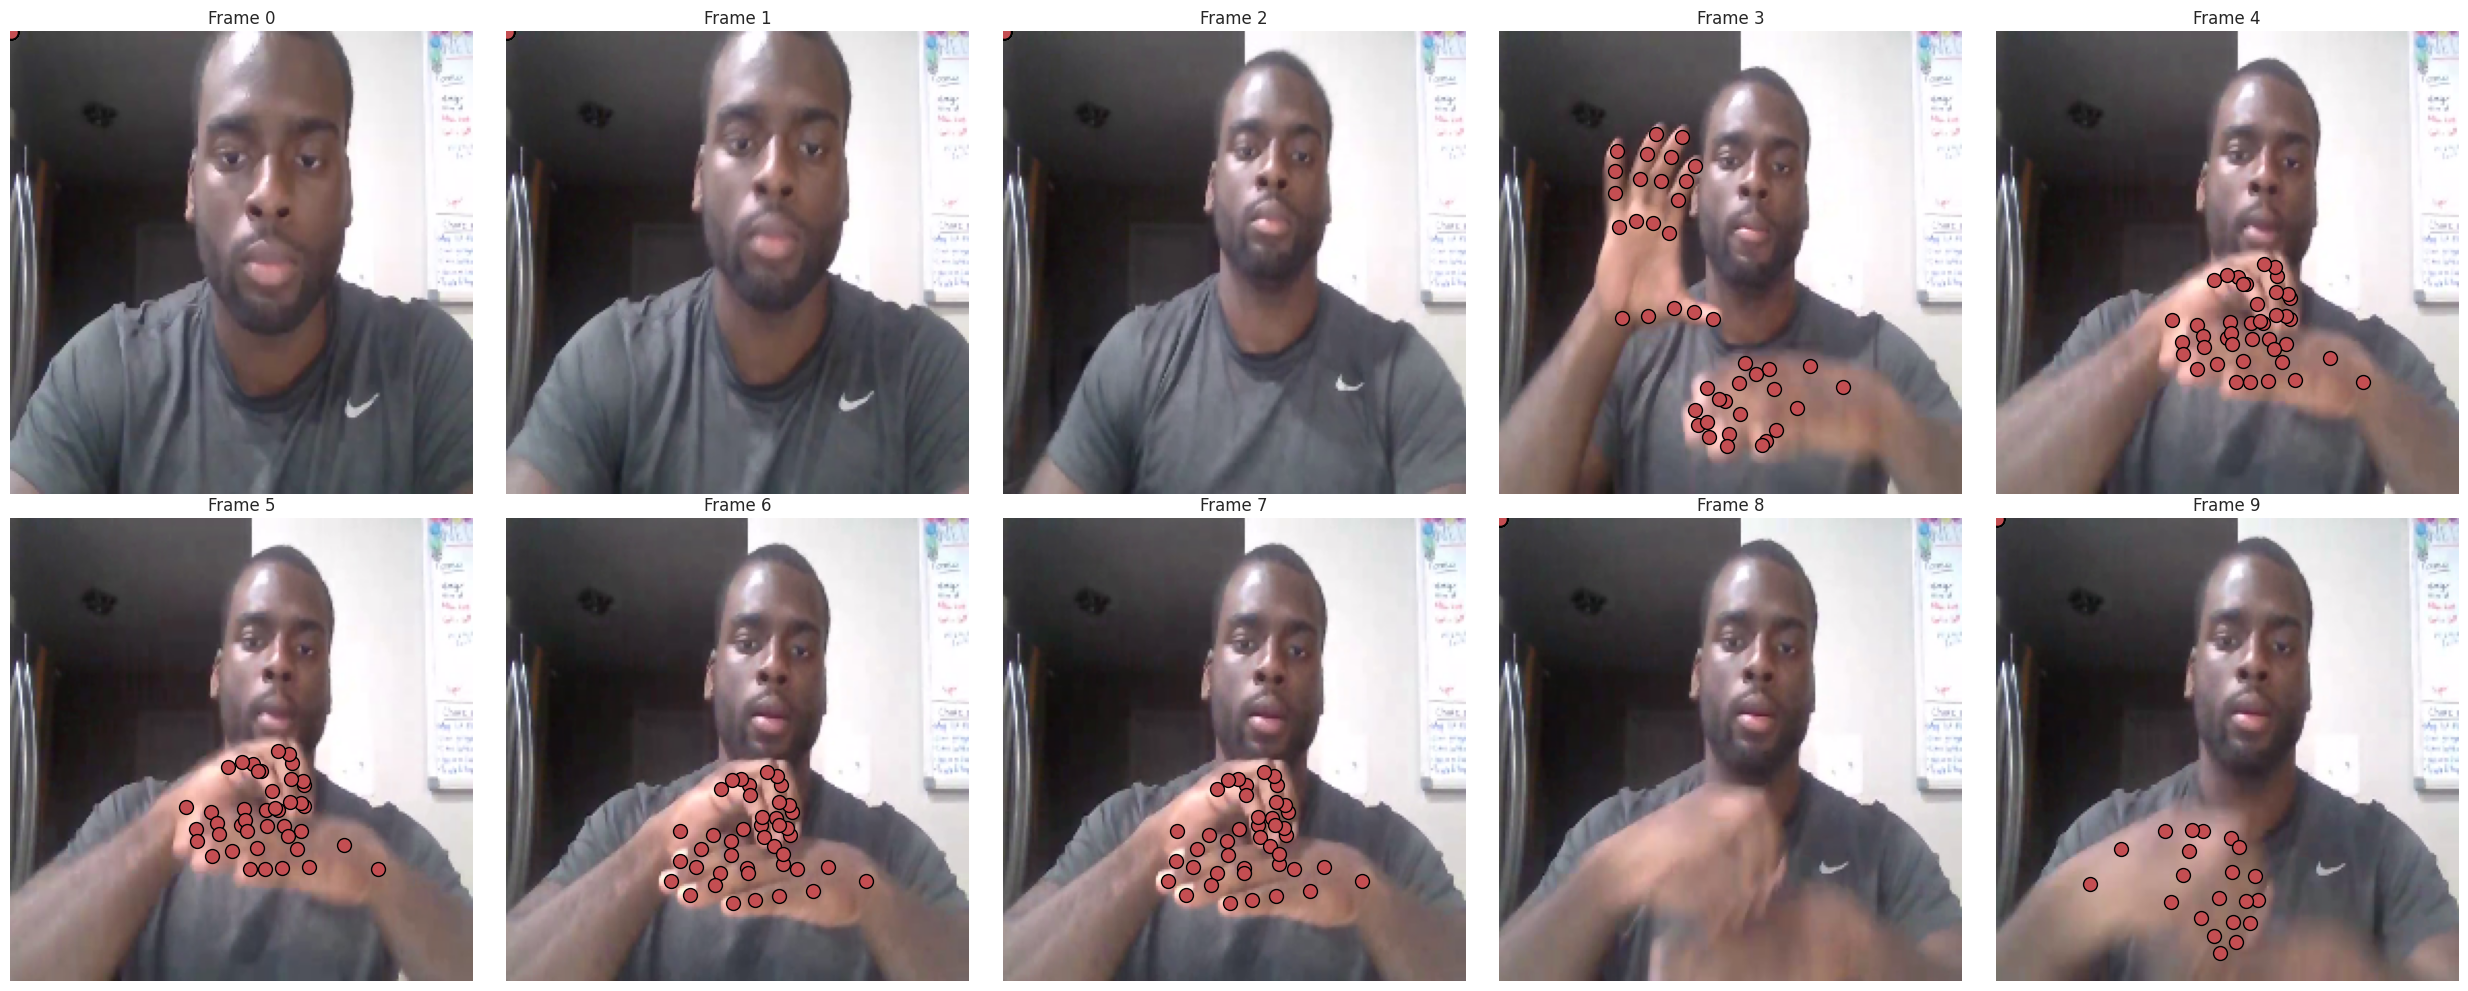

In [57]:
def plot_keypoints_on_frames(frames, keypoints, output_path=None):
    num_frames = frames.shape[0]
    
    if keypoints.shape[0] != num_frames:
        print("Number of frames in 'frames' and 'keypoints' are unequal!")
    
    # Handle keypoints reshaping
    if keypoints.ndim == 2 and keypoints.shape[1] == 126:
        keypoints = keypoints.reshape(num_frames, 42, 3)[:, :, :2]
    elif keypoints.ndim == 3 and keypoints.shape[2] == 3:
        keypoints = keypoints[:, :, :2]
    elif keypoints.ndim == 3 and keypoints.shape[2] == 2:
        pass
    else:
        raise ValueError(f"Unsupported keypoints shape: {keypoints.shape}")

    # Debug info
    print("Frame shape:", frames.shape)
    print("Keypoints shape:", keypoints.shape)
    print("Keypoints min/max (raw):", keypoints.min(), keypoints.max())

    # Scale keypoints
    height, width = frames.shape[1], frames.shape[2]
    keypoints_scaled = keypoints.copy()
    
    # Improved scaling logic
    max_val = keypoints.max()
    if max_val <= 2.0:  # Assume normalized if max is reasonably close to 1
        keypoints_scaled[:, :, 0] *= width
        keypoints_scaled[:, :, 1] *= height
        print("Scaled keypoints from normalized (0-1) to pixel coordinates")
    else:
        print("Keypoints assumed to be in pixel coordinates")

    print("Keypoints min/max (scaled):", keypoints_scaled.min(), keypoints_scaled.max())
    print("Sample keypoints (first frame):", keypoints_scaled[0][:5])

    # Video writer setup
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, 30.0, (width, height))

    # Plot setup
    rows = 2
    cols = (num_frames + 1) // 2
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()

    for i in range(num_frames):
        frame = frames[i].copy()
        
        # Ensure correct color format
        if frame.shape[-1] == 3:
            if frame.max() > 1 and frame.dtype == np.uint8:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            elif frame.max() <= 1:
                frame = (frame * 255).astype(np.uint8)
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        frame_keypoints = keypoints_scaled[i]
        
        # Video output
        if output_path:
            frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            for x, y in frame_keypoints:
                x, y = int(x), int(y)
                if 0 <= x < width and 0 <= y < height:
                    cv2.circle(frame_bgr, (x, y), 5, (0, 255, 0), -1)
            out.write(frame_bgr)

        # Plotting
        axes[i].imshow(frame)
        valid_points = 0
        for x, y in frame_keypoints:
            if 0 <= x < width and 0 <= y < height:
                # Use larger, more visible markers
                axes[i].plot(x, y, 'ro', markersize=10, markeredgecolor='black', markeredgewidth=1)
                valid_points += 1
            else:
                print(f"Frame {i}: Out of bounds keypoint - x: {x}, y: {y}")
        print(f"Frame {i}: {valid_points} valid keypoints plotted")
        axes[i].axis('off')
        axes[i].set_title(f'Frame {i}')

    for j in range(num_frames, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    if output_path:
        out.release()


plot_keypoints_on_frames(frames, keypoints)

# Graph Modelling

In [58]:
graph_dir = '/kaggle/working/graphs_tf/'
os.makedirs(graph_dir, exist_ok=True)

In [59]:
def get_spatial_edges():
    hand_connections = [
        (0, 1), (0, 5), (0, 9), (0, 13), (0, 17), #wrist to fingers
        (1, 2), (2, 3), (3, 4),                   #thumb    
        (5, 6), (6, 7), (7, 8),                   #index finger
        (9, 10), (10, 11), (11, 12),              #middle finger
        (13, 14), (14, 15), (15, 16),             #ring finger
        (17, 18), (18, 19), (19, 20)              #pinky finger
    ]
    edge_list = []
    for hand_offset in [0, 21]:
        for src, dst in hand_connections:
            edge_list.append([src + hand_offset, dst + hand_offset])
    return np.array(edge_list)  # (40, 2)

In [60]:
def build_spatio_temporal_graph(video_id, keypoints):
    num_frames = keypoints.shape[0]  
    num_nodes_per_frame = 42
    
    features = keypoints.reshape(num_frames, num_nodes_per_frame, 3)  # (10, 42, 3)
    features = tf.convert_to_tensor(features.reshape(-1, 3), dtype=tf.float32)  # (420, 3)
    
    spatial_edges = get_spatial_edges() 
    spatial_edges_per_frame = [spatial_edges + (t * num_nodes_per_frame) for t in range(num_frames)]
    spatial_edges = np.concatenate(spatial_edges_per_frame, axis=0)  # (400, 2)
    
    temporal_edges = []
    for t in range(num_frames - 1):  # 9 transitions
        for node in range(num_nodes_per_frame):
            src = t * num_nodes_per_frame + node
            dst = (t + 1) * num_nodes_per_frame + node
            temporal_edges.append([src, dst])
    temporal_edges = np.array(temporal_edges)  # (378, 2)
    
    edge_index = np.concatenate([spatial_edges, temporal_edges], axis=0)  # (778, 2)
    edge_index = tf.convert_to_tensor(edge_index, dtype=tf.int64)
    
    graph = {
        'features': features,  # (420, 3)
        'edge_index': edge_index,  # (778, 2)
        'num_nodes': num_frames * num_nodes_per_frame  # 420
    }
    logger.info(f"Graph for {video_id}: {graph['num_nodes']} nodes, {edge_index.shape[0]} edges")
    return graph

In [61]:
def process_graphs_to_dataset(train_subset):
    gloss_map = dict(zip(train_subset['video_id'].astype(str), train_subset['gloss']))
    
    graphs = {}
    for video_id in tqdm(train_subset['video_id'].astype(str), desc="Building graphs"):
        video_path = os.path.join(video_dir, video_id)
        _, keypoints, error = extract_keypoint_frames(video_path, target_frames=10)
        if error:
            logger.warning(error)
            continue
        graph = build_spatio_temporal_graph(video_id, keypoints)
        graph['gloss'] = gloss_map.get(video_id, 'unknown')
        graph_path = os.path.join(graph_dir, f"{video_id}_graph.npz")
        np.savez(graph_path, features=graph['features'].numpy(), edge_index=graph['edge_index'].numpy(), gloss=graph['gloss'])
        graphs[video_id] = graph_path
    
    graph_metadata = pd.DataFrame.from_dict(graphs, orient='index', columns=['graph_path'])
    graph_metadata.to_csv(os.path.join(graph_dir, 'graphs_metadata.csv'))
    
    def graph_generator():
        for video_id, graph_path in graphs.items():
            data = np.load(graph_path)
            yield {
                'features': tf.convert_to_tensor(data['features'], dtype=tf.float32),
                'edge_index': tf.convert_to_tensor(data['edge_index'], dtype=tf.int64),
                'gloss': tf.convert_to_tensor(data['gloss'], dtype=tf.string)
            }
    
    dataset = tf.data.Dataset.from_generator(
        graph_generator,
        output_signature={
            'features': tf.TensorSpec(shape=(420, 3), dtype=tf.float32),
            'edge_index': tf.TensorSpec(shape=(778, 2), dtype=tf.int64),
            'gloss': tf.TensorSpec(shape=(), dtype=tf.string)
        }
    ).batch(1)
    return dataset

In [62]:
dataset = process_graphs_to_dataset(train_subset.iloc[:20])
print("done")

Building graphs: 100%|██████████| 20/20 [00:47<00:00,  2.39s/it]

done


In [63]:
for graph in dataset.take(1):
    print("Features shape:", graph['features'].shape)  # (1, 420, 3)
    print("Edge index shape:", graph['edge_index'].shape)  # (1, 778, 2)
    print("Gloss:", graph['gloss'])

Features shape: (1, 420, 3)
Edge index shape: (1, 778, 2)
Gloss: tf.Tensor([b'MECHANIC1'], shape=(1,), dtype=string)


Visualizing graphs from dataset...
Graph for gloss: b'MECHANIC1'


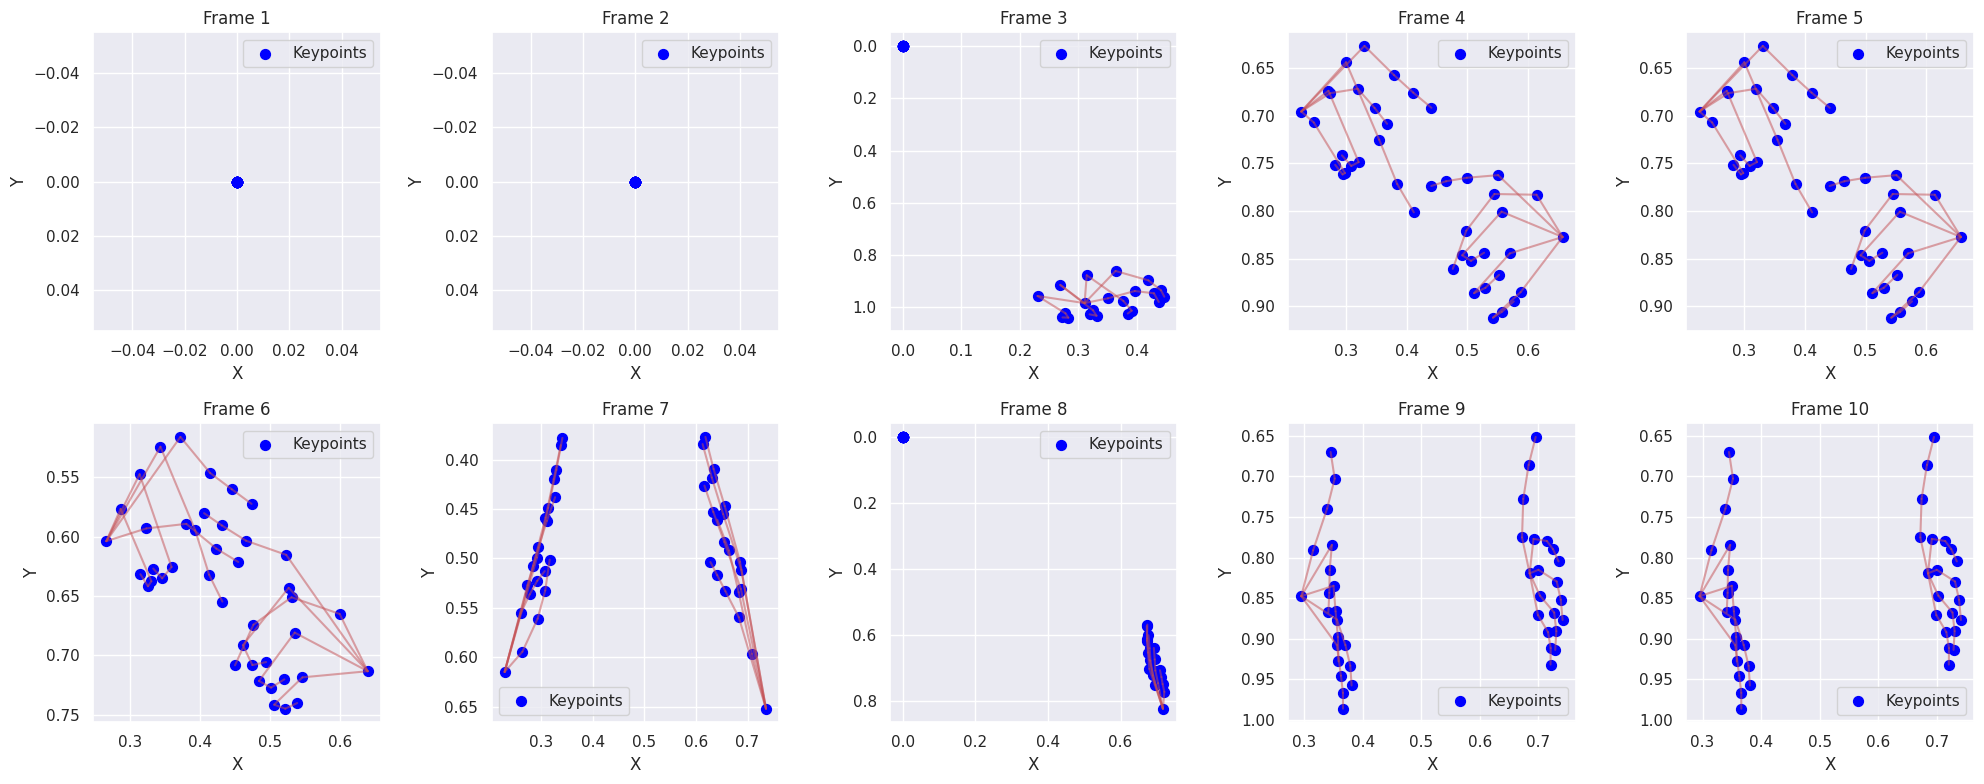

Visualization complete!


In [64]:
# Visualize spatio-temporal graphs from dataset (fixed gloss handling)

import matplotlib.pyplot as plt

# Function to plot hand keypoints for one frame
def plot_hand_keypoints(features, edges, frame_idx, ax, title):
    # Extract keypoints for one frame (42 keypoints)
    start_idx = frame_idx * 42
    end_idx = start_idx + 42
    frame_features = features[start_idx:end_idx]  # (42, 3)
    
    # Plot keypoints (x, y only for 2D)
    x = frame_features[:, 0]  # x coords
    y = frame_features[:, 1]  # y coords
    ax.scatter(x, y, c='blue', s=50, label='Keypoints')
    
    # Plot spatial edges (first 40 are spatial for each frame)
    spatial_edges = edges[:40] + start_idx  # Adjust indices for this frame
    for edge in spatial_edges:
        src, dst = edge
        ax.plot([x[src - start_idx], x[dst - start_idx]], 
                [y[src - start_idx], y[dst - start_idx]], 
                'r-', alpha=0.5)
    
    ax.set_title(title)
    ax.invert_yaxis()  # Flip y-axis (image coords)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

# Load and visualize a graph from the dataset
print("Visualizing graphs from dataset...")
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 cols for 10 frames
axes = axes.flatten()

# Take first graph from dataset
for i, graph in enumerate(dataset.take(1)):
    features = graph['features'][0].numpy()  # (420, 3)
    edges = graph['edge_index'][0].numpy()  # (778, 2)
    gloss = graph['gloss'][0]  # NumPy array, not tensor
    if isinstance(gloss, bytes):
        gloss = gloss.decode('utf-8')  # Decode if bytes
    print(f"Graph for gloss: {gloss}")
    
    # Plot each frame (10 frames total)
    for frame_idx in range(10):
        plot_hand_keypoints(features, edges, frame_idx, axes[frame_idx], 
                            f"Frame {frame_idx+1}")
    
plt.tight_layout()
plt.show()
print("Visualization complete!")

In [65]:
# 3D Visualization of spatio-temporal graph (fixed gloss decoding)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to visualize one graph in 3D
def visualize_spatio_temporal_graph_3d(features, edges, gloss):
    # Setup 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Features: (420, 3) -> x, y, z
    x = features[:, 0]  # x coords
    y = features[:, 1]  # y coords
    z = features[:, 2]  # z coords
    
    # Time dimension (frame number for color)
    time = np.repeat(np.arange(10), 42)  # 0-9 for each frame’s 42 nodes
    
    # Plot nodes (colored by frame)
    scatter = ax.scatter(x, y, z, c=time, cmap='viridis', s=50, alpha=0.6)
    plt.colorbar(scatter, ax=ax, label='Frame Number (Time)')
    
    # Spatial edges (within each frame)
    for frame_idx in range(10):
        start_idx = frame_idx * 42
        spatial_edges = edges[frame_idx * 40:(frame_idx + 1) * 40]
        for edge in spatial_edges:
            src, dst = edge
            ax.plot([x[src], x[dst]], [y[src], y[dst]], [z[src], z[dst]], 
                    'r-', alpha=0.3, linewidth=1)  # Red for spatial
    
    # Temporal edges (across frames)
    temporal_edges = edges[400:]  # Last 378 are temporal
    for edge in temporal_edges:
        src, dst = edge
        ax.plot([x[src], x[dst]], [y[src], y[dst]], [z[src], z[dst]], 
                'b--', alpha=0.2, linewidth=1)  # Blue dashed for temporal
    
    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Depth)')
    ax.set_title(f'Spatio-Temporal Graph for "{gloss}"')
    
    plt.show()
    print("3D Visualization complete!")

# Load and visualize first graph from dataset
print("Loading graph for 3D visualization...")
for i, graph in enumerate(dataset.take(1)):
    features = graph['features']

Loading graph for 3D visualization...


Loading...
Visualizing graph for gloss: MECHANIC1


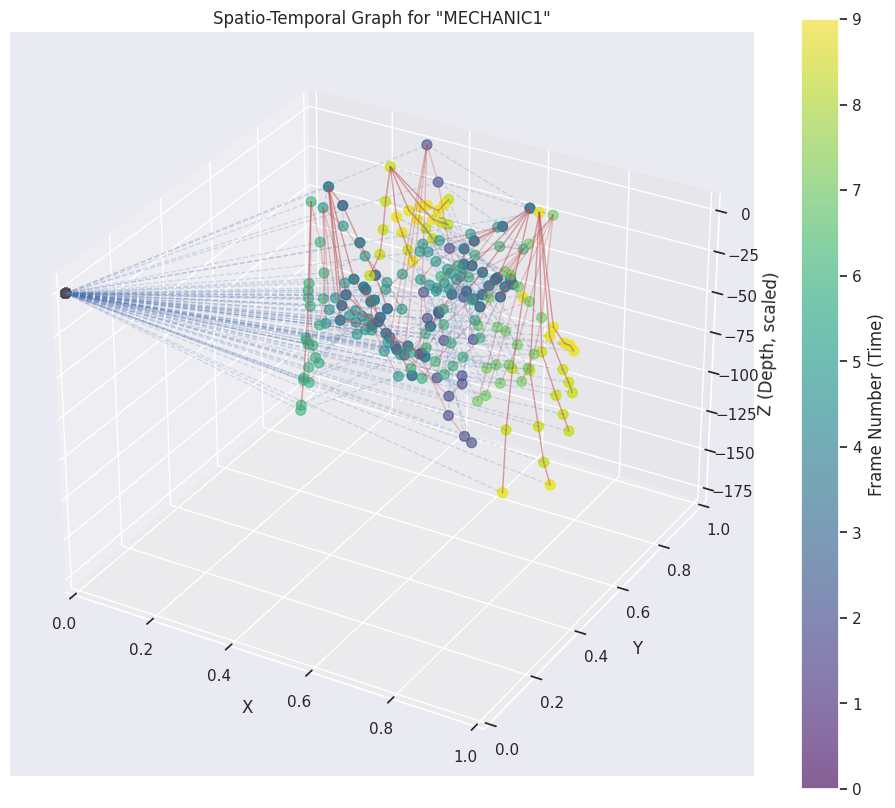

Comppleted...


In [66]:
# 3D Visualization of spatio-temporal graph (with debug)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to visualize one graph in 3D
def visualize_spatio_temporal_graph_3d(features, edges, gloss):
    # Debug: Check features
    # print(f"DEBUG: Features shape: {features.shape}")
    # print(f"DEBUG: Features min/max - x: {features[:, 0].min():.3f}/{features[:, 0].max():.3f}, "
    #       f"y: {features[:, 1].min():.3f}/{features[:, 1].max():.3f}, "
    #       f"z: {features[:, 2].min():.3f}/{features[:, 2].max():.3f}")
    # non_zero_count = np.count_nonzero(features)
    # print(f"DEBUG: Non-zero values in features: {non_zero_count} out of {features.size}")
    
    # Setup 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Features: (420, 3) -> x, y, z
    x = features[:, 0]
    y = features[:, 1]
    z = features[:, 2]
    
    # Amplify z for visibility (MediaPipe z is tiny)
    z = z * 1000  # Scale z by 1000 to make depth visible
    
    # Time dimension (frame number for color)
    time = np.repeat(np.arange(10), 42)
    
    # Plot nodes
    scatter = ax.scatter(x, y, z, c=time, cmap='viridis', s=50, alpha=0.6)
    plt.colorbar(scatter, ax=ax, label='Frame Number (Time)')
    
    # Spatial edges
    for frame_idx in range(10):
        start_idx = frame_idx * 42
        spatial_edges = edges[frame_idx * 40:(frame_idx + 1) * 40]
        for edge in spatial_edges:
            src, dst = edge
            ax.plot([x[src], x[dst]], [y[src], y[dst]], [z[src], z[dst]], 
                    'r-', alpha=0.3, linewidth=1)
    
    # Temporal edges
    temporal_edges = edges[400:]
    for edge in temporal_edges:
        src, dst = edge
        ax.plot([x[src], x[dst]], [y[src], y[dst]], [z[src], z[dst]], 
                'b--', alpha=0.2, linewidth=1)
    
    # Labels and limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Depth, scaled)')
    ax.set_title(f'Spatio-Temporal Graph for "{gloss}"')
    
    # Set axis limits to ensure visibility
    ax.set_xlim([0, 1])  # x, y are normalized 0-1
    ax.set_ylim([0, 1])
    ax.set_zlim([z.min(), z.max()])
    
    plt.show()

# Load and visualize first graph from dataset
print("Loading...")
for i, graph in enumerate(dataset.take(1)):
    features = graph['features'][0].numpy()  # (420, 3)
    edges = graph['edge_index'][0].numpy()  # (778, 2)
    gloss = graph['gloss'].numpy()[0].decode('utf-8')
    print(f"Visualizing graph for gloss: {gloss}")
    visualize_spatio_temporal_graph_3d(features, edges, gloss)

print("Comppleted...")


Blue lines represent the temporal features across frames in a video <br>
red lines are the edges connecting nodes (joints) within a frame <br>
Different colors represent different frames of the video. For instance :  Violet represents frame 0 whereas yellow presents frame 10

In [72]:
# Interactive 3D Visualization of spatio-temporal graph with Plotly

import plotly.graph_objects as go
import numpy as np

# Function to visualize one graph interactively in 3D
def visualize_spatio_temporal_graph_3d_interactive(features, edges, gloss):
    # Features: (420, 3) -> x, y, z
    x = features[:, 0]
    y = features[:, 1]
    z = features[:, 2] * 1000  # Scale z for visibility
    
    # Time dimension (frame number for color)
    time = np.repeat(np.arange(10), 42)
    
    # Nodes: 3D Scatter
    scatter = go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(size=5, color=time, colorscale='Viridis', opacity=0.6),
        text=[f"Node {i}, Frame {t}" for i, t in enumerate(time)],  # Hover info
        hoverinfo='text'
    )
    
    # Spatial edges: Red lines
    spatial_traces = []
    for frame_idx in range(10):
        start_idx = frame_idx * 42
        spatial_edges = edges[frame_idx * 40:(frame_idx + 1) * 40]
        for edge in spatial_edges:
            src, dst = edge
            spatial_traces.append(go.Scatter3d(
                x=[x[src], x[dst]], y=[y[src], y[dst]], z=[z[src], z[dst]],
                mode='lines',
                line=dict(color='red', width=2),
                opacity=0.3,
                hoverinfo='none'
            ))
    
    # Temporal edges: Blue dashed lines
    temporal_traces = []
    temporal_edges = edges[400:]
    for edge in temporal_edges:
        src, dst = edge
        temporal_traces.append(go.Scatter3d(
            x=[x[src], x[dst]], y=[y[src], y[dst]], z=[z[src], z[dst]],
            mode='lines',
            line=dict(color='blue', width=2, dash='dash'),
            opacity=0.2,
            hoverinfo='none'
        ))
    
    # Combine traces
    data = [scatter] + spatial_traces + temporal_traces
    
    # Layout
    layout = go.Layout(
        title=f'Spatio-Temporal Graph for "{gloss}"',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z (Depth, scaled)',
            xaxis=dict(range=[0, 1]),
            yaxis=dict(range=[0, 1]),
            zaxis=dict(range=[z.min(), z.max()])
        ),
        showlegend=False
    )
    
    # Plot
    fig = go.Figure(data=data, layout=layout)
    fig.show()
    print("Interactive 3D Visualization complete!")

# Load and visualize first graph from dataset
print("Loading graph for interactive 3D visualization...")
for i, graph in enumerate(dataset.take(1)):
    features = graph['features'][0].numpy()  # (420, 3)
    edges = graph['edge_index'][0].numpy()  # (778, 2)
    gloss = graph['gloss'].numpy()[0].decode('utf-8')
    print(f"Visualizing graph for gloss: {gloss}")
    visualize_spatio_temporal_graph_3d_interactive(features, edges, gloss)

Loading graph for interactive 3D visualization...
Visualizing graph for gloss: MECHANIC1


Interactive 3D Visualization complete!


In [68]:
# GCN Layer
class GCNLayer(tf.keras.layers.Layer):
    def __init__(self, output_dim, activation='relu'):
        super(GCNLayer, self).__init__()
        self.output_dim = output_dim
        self.activation = tf.keras.activations.get(activation)
    
    def build(self, input_shape):
        self.W = self.add_weight(name='W', shape=(input_shape[-1], self.output_dim),
                                 initializer='glorot_uniform', trainable=True)
        self.b = self.add_weight(name='b', shape=(self.output_dim,),
                                 initializer='zeros', trainable=True)
    
    def call(self, inputs, edge_index):
        x = inputs  # (batch, 420, input_dim)
        num_nodes = tf.shape(x)[1]  # 420
        
        # Build sparse adjacency matrix
        adj = tf.sparse.SparseTensor(
            indices=tf.cast(edge_index[0], tf.int64),  # Unbatch edge_index
            values=tf.ones(tf.shape(edge_index)[1], dtype=tf.float32),
            dense_shape=[num_nodes, num_nodes]
        )
        adj = tf.sparse.add(adj, tf.sparse.eye(num_nodes))  # Add self-loops
        adj = tf.sparse.reorder(adj)  # Sort indices for SparseToDense
        adj = tf.sparse.to_dense(adj)
        
        # Normalize: D^-1/2 * A * D^-1/2
        degree = tf.reduce_sum(adj, axis=1)
        D_inv_sqrt = tf.pow(degree, -0.5)
        D_inv_sqrt = tf.where(tf.math.is_inf(D_inv_sqrt), 0., D_inv_sqrt)
        norm_adj = adj * D_inv_sqrt[:, None] * D_inv_sqrt[None, :]
        
        # GCN: A * X * W + b
        out = tf.matmul(norm_adj, x)
        out = tf.matmul(out, self.W) + self.b
        return self.activation(out)

In [69]:
# GNN Model
class SpatioTemporalGNN(tf.keras.Model):
    def __init__(self, hidden_dim=64, state_dim=16):
        super(SpatioTemporalGNN, self).__init__()
        self.gcn1 = GCNLayer(hidden_dim)
        self.gcn2 = GCNLayer(hidden_dim)
        self.pool = layers.GlobalAveragePooling1D()
        self.dense = layers.Dense(state_dim)
    
    def call(self, inputs):
        x = inputs['features']  # (batch, 420, 3)
        edge_index = inputs['edge_index']  # (batch, 778, 2)
        
        h = self.gcn1(x, edge_index)  # (batch, 420, 64)
        h = self.gcn2(h, edge_index)  # (batch, 420, 64)
        out = self.pool(h)  # (batch, 64)
        out = self.dense(out)  # (batch, 16)
        return out

In [70]:
# Build and test the GNN
print("Building GNN model...")
gnn_model = SpatioTemporalGNN(hidden_dim=64, state_dim=16)

print("Testing GNN on dataset...")
for i, graph in enumerate(dataset.take(1)):
    state = gnn_model(graph)
    print(f"Graph {i+1} - Input features shape: {graph['features'].shape}")
    print(f"Graph {i+1} - Edge index shape: {graph['edge_index'].shape}")
    print(f"Graph {i+1} - GNN output state shape: {state.shape}")
    print(f"Graph {i+1} - GNN output sample (first 5): {state[0][:5].numpy()}")
    print(f"Graph {i+1} - Gloss: {graph['gloss'].numpy()[0].decode('utf-8')}")
print("GNN test complete!")

Building GNN model...
Testing GNN on dataset...
Graph 1 - Input features shape: (1, 420, 3)
Graph 1 - Edge index shape: (1, 778, 2)
Graph 1 - GNN output state shape: (1, 16)
Graph 1 - GNN output sample (first 5): [ 0.01114283 -0.03582373 -0.02308384 -0.05956137 -0.00382605]
Graph 1 - Gloss: MECHANIC1
GNN test complete!
